In [66]:
import numpy as np
import pandas as pd
import wave 
import matplotlib.pyplot as plt
import librosa
import os
import module as md
import scipy


先把聲音分別輸入到python處理好並分別儲存下來

In [71]:
def params(file):
    params = file.getparams()
    signal_wave = file.readframes(params[3])
    signal_array = np.frombuffer(signal_wave, dtype=np.int16)
    envelope = np.abs(scipy.signal.hilbert(signal_array))
    #讓音頻陣列化
    frames = file.getnframes()#採樣點數
    freq = file.getframerate()#採樣率
    amplitude = np.abs(signal_array)#振福的變量
    return signal_array , freq , amplitude

In [105]:
soundpath  = r"D:\使用者\Desktop\python\kaggle competition\recognition of voice emotion\archive (3)\Actor_01\03-01-01-01-01-01-01.wav"
file = wave.open(soundpath, 'r')
fname = os.path.basename(soundpath)
signal_array , freq , amplitude = params(file)

amplitude

array([0, 0, 0, ..., 0, 0, 0], dtype=int16)

In [106]:
#把signal_array沒有聲音的部分去除
seperate_signal = []

start = 0
end = 0
for i in range(len(signal_array)):
    if amplitude[i] != 0:
        for j in range(i,len(amplitude)):
            if amplitude[j] == 0 and amplitude[j+1] == 0 and amplitude[j+2] == 0:
                end = j
                break
            else:
                continue
        seperate_segment = np.array(signal_array[start:end])
        seperate_signal.append(seperate_segment)
        i = end

    else:
        continue
    


In [107]:
seperate_signal

[array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1], dtype=int16),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int16),
 array([0, 0, 0, ..., 0, 0, 1], dtype=int16),
 array([ 0,  0,  0, ...,  0,  0, -1], dtype=int16),
 array([ 

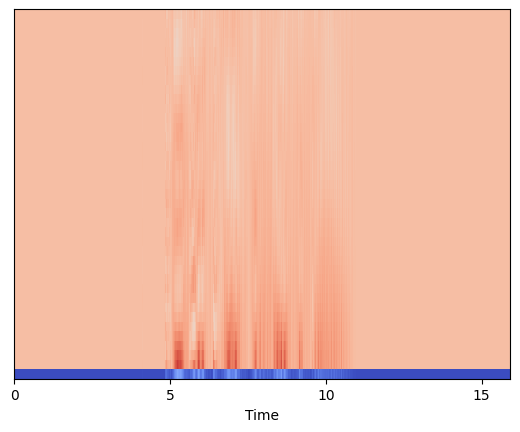

In [103]:
nperseg = max(len(signal_array) // 500, 4)
noverlap = max(len(signal_array) // 750, 1)
while noverlap >= nperseg:
    noverlap = nperseg - 1
i = signal_array.astype(float)
Zxx = md.stft(i , freq , nperseg, noverlap , "hann")
#計算功率譜
power_spectrogram = np.abs(Zxx) ** 2
mfccs = librosa.feature.mfcc(S=librosa.power_to_db(power_spectrogram), n_mfcc=39)

# delta_mfccs = librosa.feature.delta(mfccs,order=1)
# delta2_mfccs = librosa.feature.delta(mfccs,order=2)
# combined_mfcc = np.concatenate((mfccs, delta_mfccs,delta2_mfccs), axis=1)

# 使用 librosa.display.specshow 将 MFCC 特征绘制成图表
librosa.display.specshow(mfccs, x_axis='time', sr=freq)
#儲存圖片
plt.savefig(r"D:\使用者\Desktop\python\kaggle competition\recognition of voice emotion\聲音圖\聲音圖{}.png".format(fname))
